In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 
import numpy as np 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(x_train), len(x_test)

(60000, 10000)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

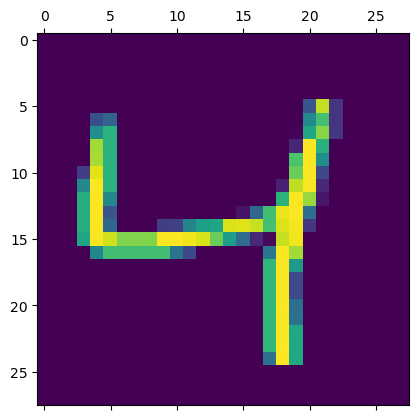

In [13]:
plt.matshow(x_train[2]) 

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
x_train.shape

(60000, 28, 28)

In [25]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

(60000, 784)

In [19]:
x_test_flattened = x_test.reshape(len(x_test), x_test.shape[1]*x_test.shape[2])
x_test_flattened.shape


(10000, 784)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid") 
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.5585 - accuracy: 0.8412
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.9610 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6576 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.4380 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.3503 - accuracy: 0.8857


In [29]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 5.7626 - accuracy: 0.8928


[5.76259708404541, 0.892799973487854]

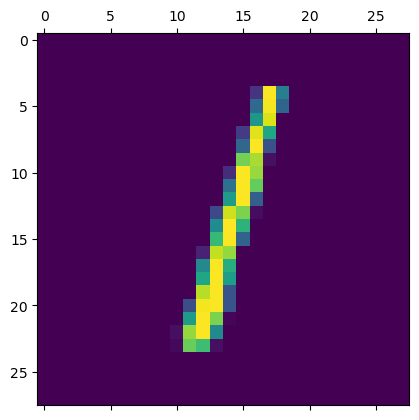

In [41]:
plt.matshow(x_test[2])

In [39]:
y_pred = model.predict(x_test_flattened)
y_pred[2]

313/313 [==============================] - 0s 1ms/step


array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       8.0033653e-12, 3.7807105e-08, 9.9946970e-01, 1.0000000e+00,
       1.0000000e+00, 9.9120408e-01], dtype=float32)

In [40]:
np.argmax(y_pred[2])

1

In [42]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[3, 0, 1, 0, 2]

In [43]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    1,    2,    0,    0,    0,    0,    0],
       [   2, 1131,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 186,  350,  486,    1,    8,    0,    1,    0,    0,    0],
       [ 136,  258,  434,  181,    0,    1,    0,    0,    0,    0],
       [  38,   82,  118,   75,  667,    0,    0,    2,    0,    0],
       [ 182,   81,  207,  207,   75,  139,    0,    0,    1,    0],
       [ 198,   53,  613,   12,   39,   15,   28,    0,    0,    0],
       [  71,  104,  183,  527,   79,   27,    0,   37,    0,    0],
       [  42,  355,  396,   95,   31,   44,    0,    1,   10,    0],
       [  29,  100,   63,  415,  363,    5,    0,   23,    5,    6]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

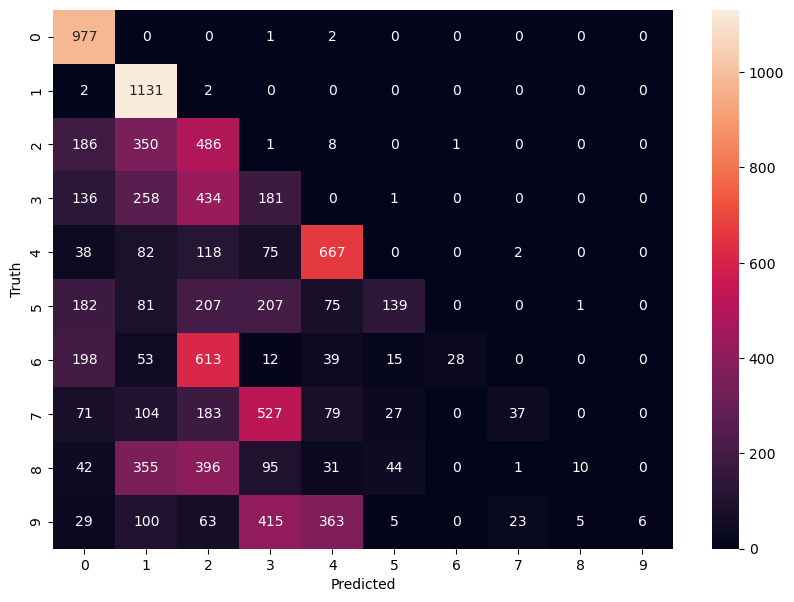

In [49]:
import seaborn as sn 
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [51]:
# Improving the Model

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid") 
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4047 - accuracy: 0.8512
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3907 - accuracy: 0.9038
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3042 - accuracy: 0.9239
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2598 - accuracy: 0.9334
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2277 - accuracy: 0.9412
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2150 - accuracy: 0.9450
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1980 - accuracy: 0.9486
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1908 - accuracy: 0.9509
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1943 - accuracy: 0.9514
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.183

In [53]:
y_pred = model.predict(x_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    2,    0,    1,    0,    0,    0,    6,    1],
       [  29, 1101,    1,    0,    0,    1,    0,    0,    3,    0],
       [ 814,  134,   46,    1,    0,    1,    0,    2,   34,    0],
       [ 741,  222,    8,   20,    1,    2,    0,    0,   10,    6],
       [ 231,  408,   72,   24,  219,    0,    0,    3,   13,   12],
       [ 720,   20,    3,   87,    0,   40,    2,    0,   18,    2],
       [ 818,   10,   51,    0,    3,   16,   45,    0,   15,    0],
       [  24,  482,   46,  123,   28,    1,    0,  303,    6,   15],
       [  10,    7,    6,    2,    9,    6,    1,    1,  919,   13],
       [  54,  113,  231,  184,  128,    3,    0,    8,   10,  278]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

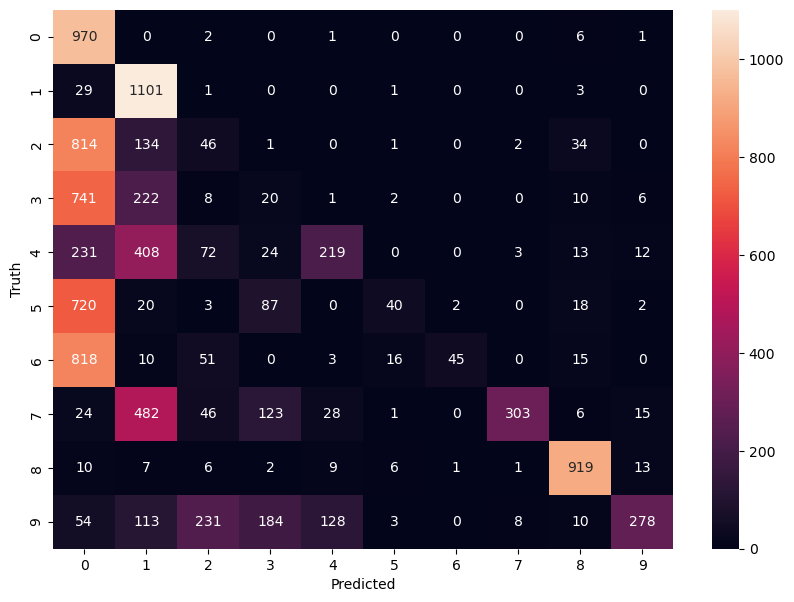

In [54]:
import seaborn as sn 
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [55]:
# Without using Flatten 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), 
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid") 
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2265 - accuracy: 0.8408
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2844 - accuracy: 0.9266
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2510 - accuracy: 0.9359
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2371 - accuracy: 0.9394
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2227 - accuracy: 0.9419
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2089 - accuracy: 0.9461
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2087 - accuracy: 0.9471
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1964 - accuracy: 0.9494
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.195